# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data=pd.read_csv('Bank_data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
data=raw_data.copy()
data=data.drop(['Unnamed: 0'],axis=1)
data['y']=data['y'].map({'yes':1,'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [5]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
x1=data['duration']
y=data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [8]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
result_log=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<function matplotlib.pyplot.show(*args, **kw)>

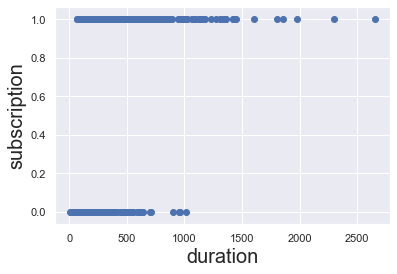

In [9]:
plt.scatter(x1,y)
plt.xlabel('duration',size=20)
plt.ylabel('subscription',size=20)
plt.show

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [14]:
X1=data[['interest_rate','march','credit','previous']]
Y=data['y']

In [15]:
X=sm.add_constant(X1)
reg_log1=sm.Logit(Y,X)
result_log1=reg_log1.fit()

Optimization terminated successfully.
         Current function value: 0.522772
         Iterations 7


### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [17]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [19]:
confusion_matrix(X,Y,result_log1)

(array([[226.,  33.],
        [ 86., 173.]]),
 0.7702702702702703)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [21]:
raw_test_data=pd.read_csv('Bank_data_testing.csv')
raw_test_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [22]:
test_data=raw_test_data.copy()
test_data=test_data.drop(['Unnamed: 0'],axis=1)
test_data['y']=test_data['y'].map({'yes':1,'no':0})
test_data

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [26]:
x1_test=data[['interest_rate','march','credit','previous']]
y_test=data['y']
x_test=sm.add_constant(x1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [27]:
confusion_matrix(x_test,y_test,result_log1)

(array([[226.,  33.],
        [ 86., 173.]]),
 0.7702702702702703)

In [28]:
confusion_matrix(X,y,result_log1)

(array([[226.,  33.],
        [ 86., 173.]]),
 0.7702702702702703)